runs/train\yolov8-uavdt4\weights\best.pt
Running prediction on: img000001.jpg

image 1/1 d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch\7_MTP\Pipeline\dataset\UAVDT-processed\val\images\img000001.jpg: 352x640 18 cars, 42.9ms
Speed: 1.4ms preprocess, 42.9ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)


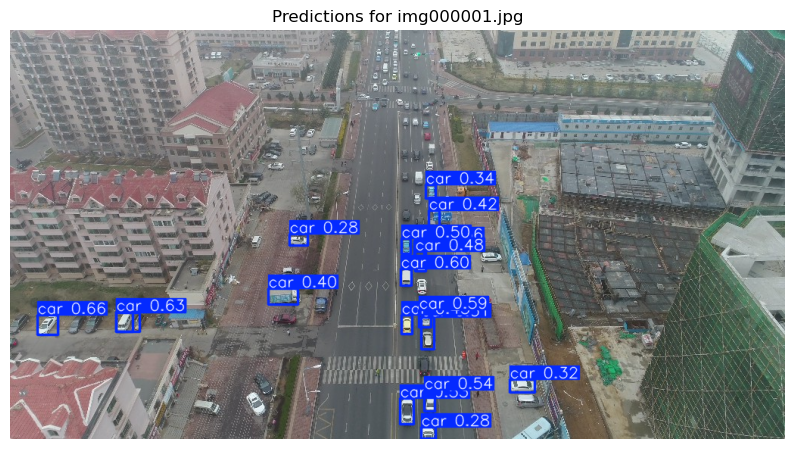

Running prediction on: img000002.jpg

image 1/1 d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch\7_MTP\Pipeline\dataset\UAVDT-processed\val\images\img000002.jpg: 352x640 19 cars, 47.9ms
Speed: 1.2ms preprocess, 47.9ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)


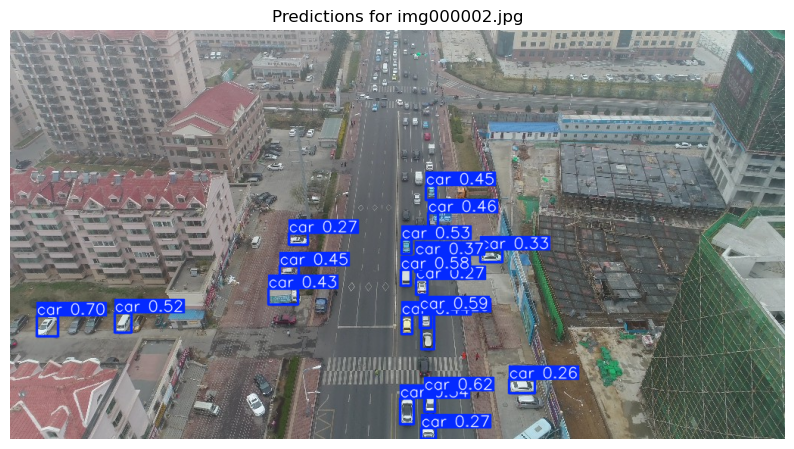

Running prediction on: img000003.jpg

image 1/1 d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch\7_MTP\Pipeline\dataset\UAVDT-processed\val\images\img000003.jpg: 352x640 18 cars, 74.4ms
Speed: 1.3ms preprocess, 74.4ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


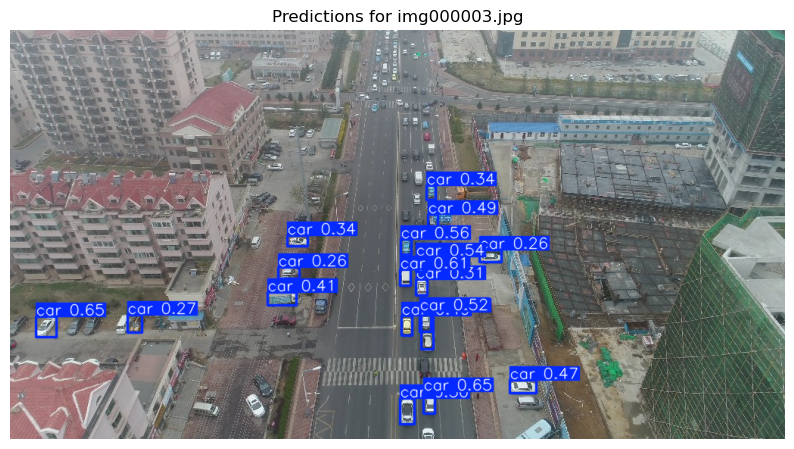

Running prediction on: img000004.jpg

image 1/1 d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch\7_MTP\Pipeline\dataset\UAVDT-processed\val\images\img000004.jpg: 352x640 16 cars, 49.7ms
Speed: 1.7ms preprocess, 49.7ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)


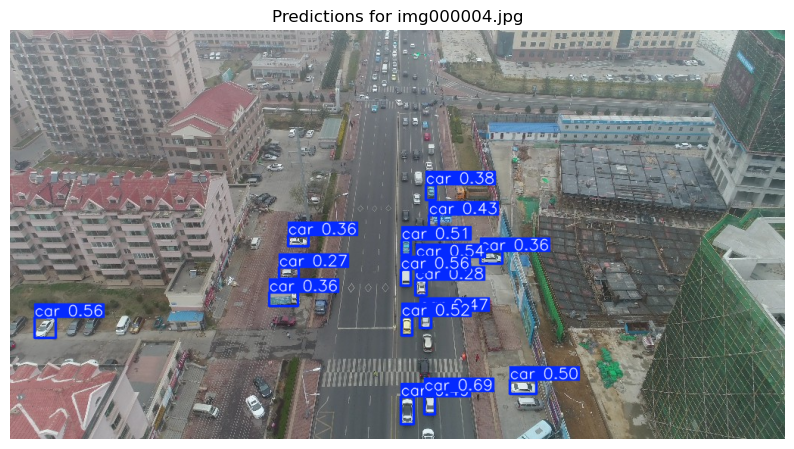

Running prediction on: img000005.jpg

image 1/1 d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch\7_MTP\Pipeline\dataset\UAVDT-processed\val\images\img000005.jpg: 352x640 17 cars, 64.2ms
Speed: 1.6ms preprocess, 64.2ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)


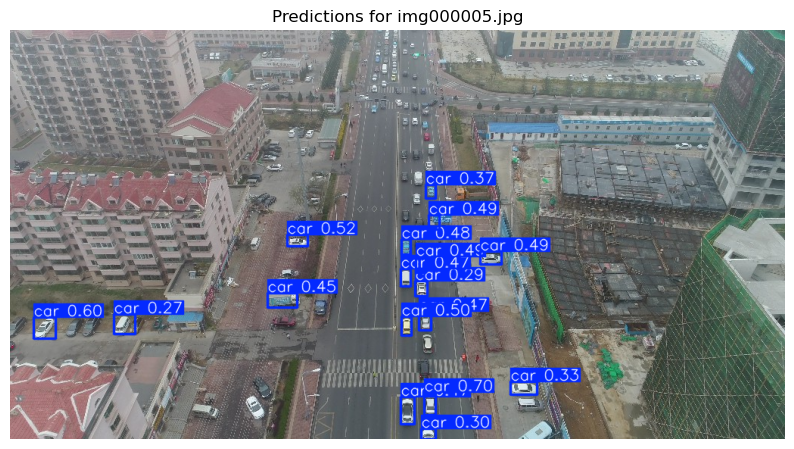

Running prediction on: img000006.jpg

image 1/1 d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch\7_MTP\Pipeline\dataset\UAVDT-processed\val\images\img000006.jpg: 352x640 18 cars, 40.7ms
Speed: 1.1ms preprocess, 40.7ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)


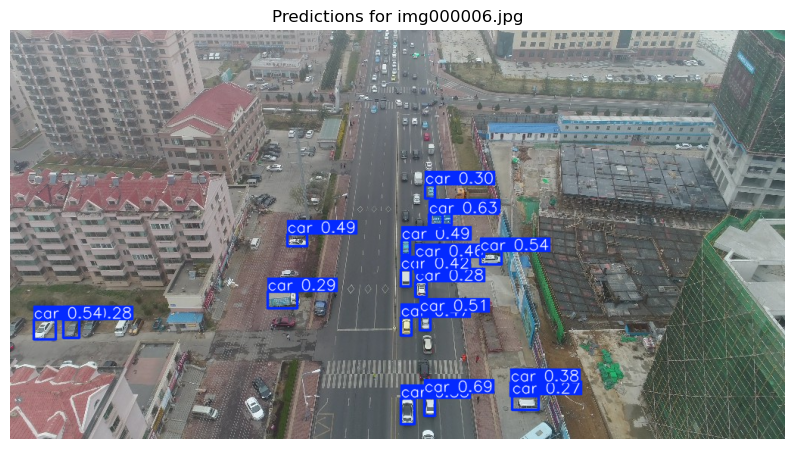

Running prediction on: img000007.jpg

image 1/1 d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch\7_MTP\Pipeline\dataset\UAVDT-processed\val\images\img000007.jpg: 352x640 18 cars, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)


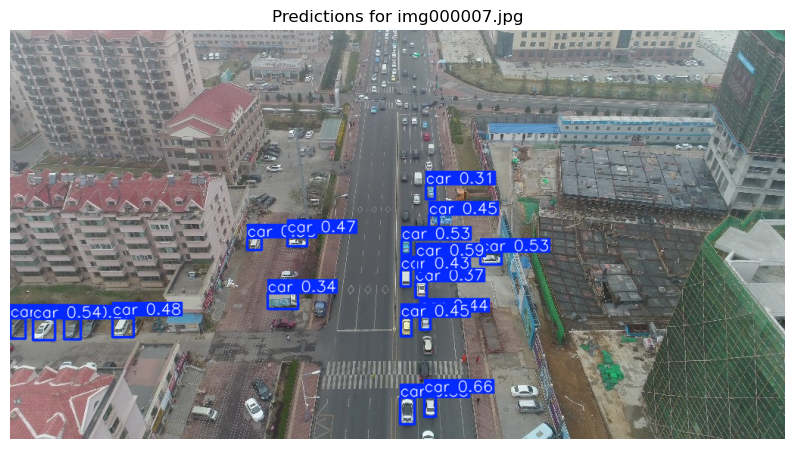

Running prediction on: img000008.jpg

image 1/1 d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch\7_MTP\Pipeline\dataset\UAVDT-processed\val\images\img000008.jpg: 352x640 17 cars, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)


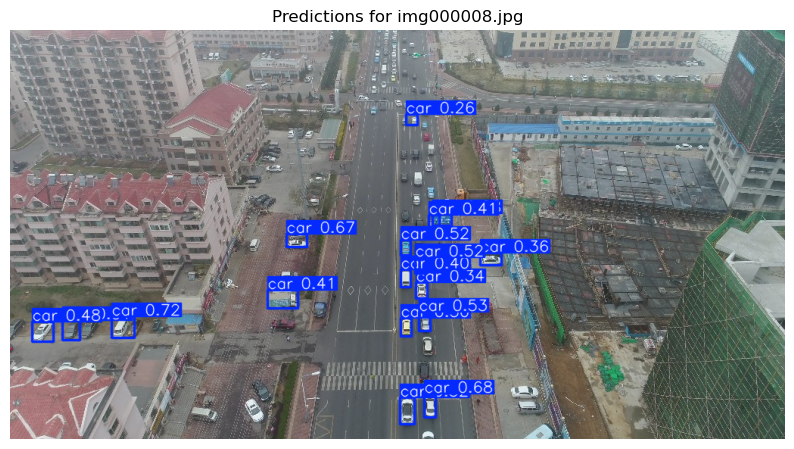

Running prediction on: img000009.jpg

image 1/1 d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch\7_MTP\Pipeline\dataset\UAVDT-processed\val\images\img000009.jpg: 352x640 17 cars, 49.7ms
Speed: 1.6ms preprocess, 49.7ms inference, 9.2ms postprocess per image at shape (1, 3, 352, 640)


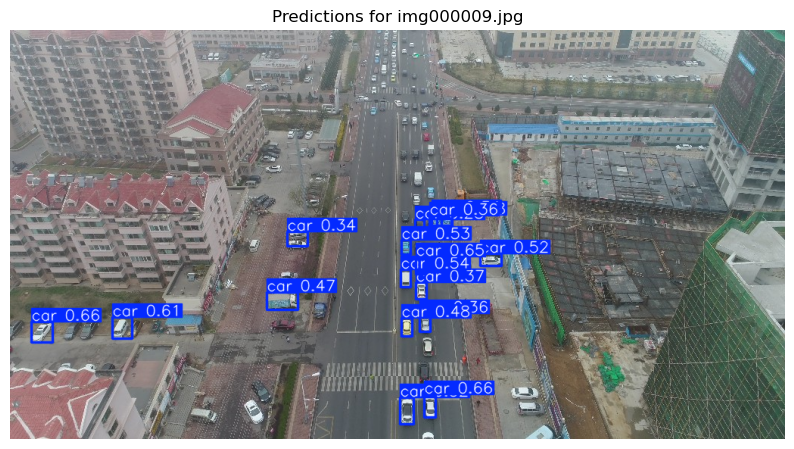

Running prediction on: img000010.jpg

image 1/1 d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch\7_MTP\Pipeline\dataset\UAVDT-processed\val\images\img000010.jpg: 352x640 19 cars, 48.3ms
Speed: 1.0ms preprocess, 48.3ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)


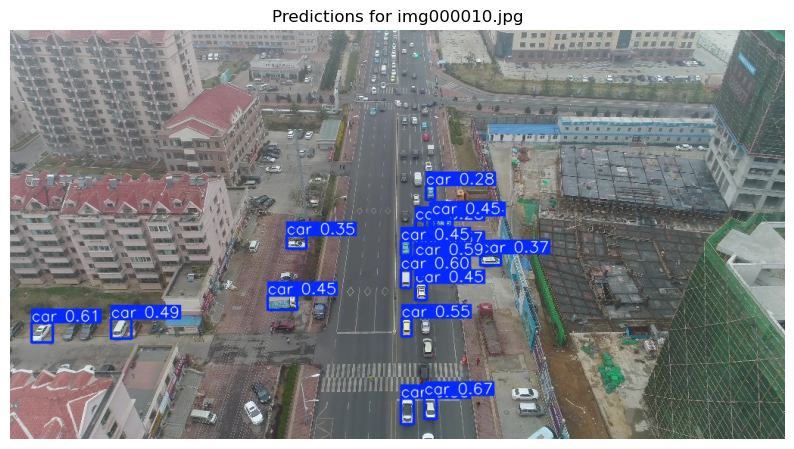

In [1]:
import os
from ultralytics import YOLO

import os

root_dir = "runs/train"

best_weights = []

for subdir in os.listdir(root_dir):
    full_path = os.path.join(root_dir, subdir, "weights", "best.pt")
    if os.path.isfile(full_path):
        best_weights.append(full_path)

# Print all found paths
for path in best_weights:
    print(path)


# model = YOLO(path)

# # Test on a single image (put your own image path)
# results = model("dataset/UAVDT-processed/val/images/img000003.jpg", save=True)

# # Show predictions inline
# results[0].show()

import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLO model
model = YOLO(path)

# Directory with validation images
image_dir = "dataset/UAVDT-processed/val/images"

# Optional: show only first N images
max_to_show = 10
count = 0

# Iterate over image files
for img_file in os.listdir(image_dir):
    if not img_file.endswith(".jpg"):
        continue

    img_path = os.path.join(image_dir, img_file)
    print(f"Running prediction on: {img_file}")

    # Run prediction
    results = model(img_path, conf=0.25)

    # Get rendered image with boxes
    rendered_img = results[0].plot()  # This returns a BGR image

    # Convert to RGB for matplotlib
    rendered_img = cv2.cvtColor(rendered_img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(rendered_img)
    plt.title(f"Predictions for {img_file}")
    plt.axis('off')
    plt.show()

    count += 1
    if count >= max_to_show:
        break

